# code to demo where we have known spikes and bad channels to apply to ECoG TBI data

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from py_ecog_utils import line_length

#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib import colormaps
%matplotlib widget

import mne

# use neurodsp toolbox to generate signal and plot

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed,create_times

# import utilities for plotting
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series, plot_bursts

In [5]:
data_base_path = '/Users/davidcaldwell/Data/seahorse_data/an/preprocessed'
data_specific = '/EC129/EC129_B9'
data_dict= scipy.io.loadmat(data_base_path + data_specific + '/MAT files/EC129_B9_notched.mat')
bad_channels = scipy.io.loadmat(data_base_path + data_specific + '/EC129_B9_badch.mat')

In [6]:
sfx = data_dict['sfx'].item()

In [7]:
sfx = data_dict['sfx'].item()
data_int = data_dict['d']
ch_names = [str(i) for i in range(data_int.shape[1])]
info = mne.create_info(ch_names=ch_names, sfreq=sfx, ch_types='ecog')
raw = mne.io.RawArray(data_int.T, info)
data_ll = line_length.line_length_transform(data_int, sfx=sfx,llw=0.04,badch=bad_channels)
raw_ll = mne.io.RawArray(data_ll.T, info)


Creating RawArray with float64 data, n_channels=330, n_times=190449
    Range : 0 ... 190448 =      0.000 ...   371.969 secs
Ready.
Creating RawArray with float64 data, n_channels=330, n_times=190449
    Range : 0 ... 190448 =      0.000 ...   371.969 secs
Ready.


Using matplotlib as 2D backend.


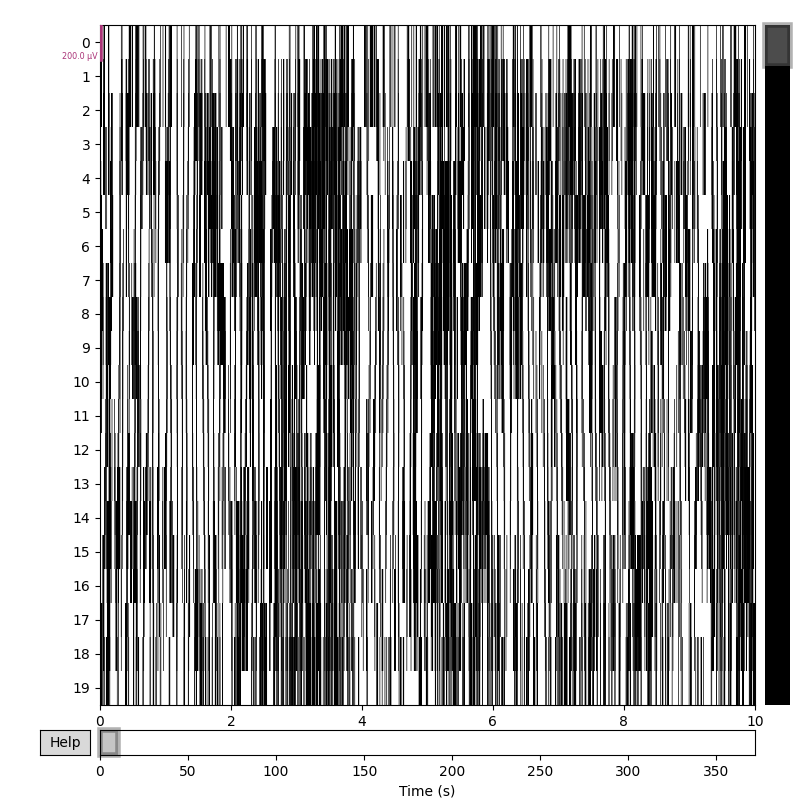

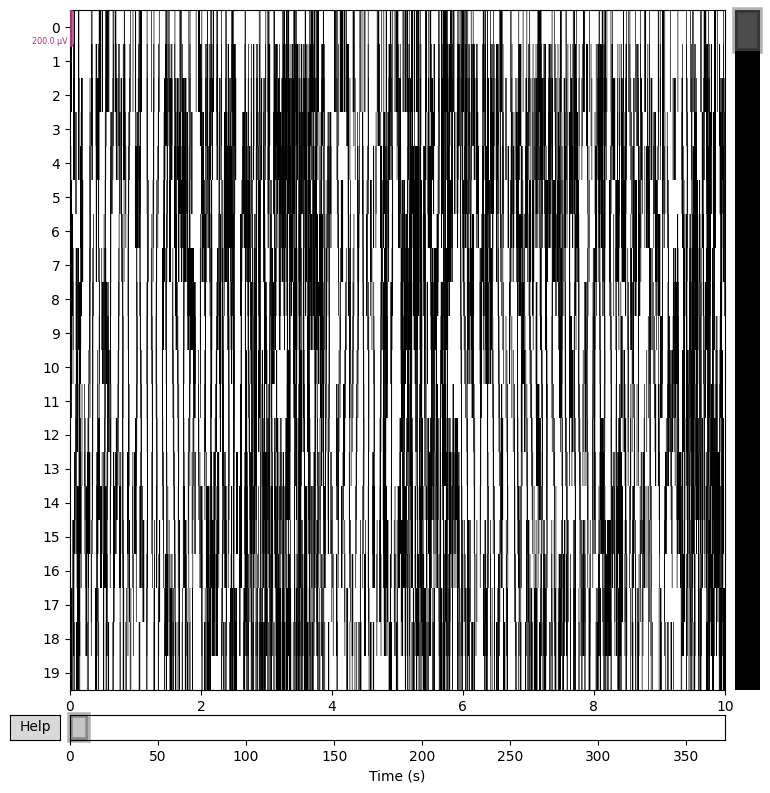

In [8]:
raw.plot()

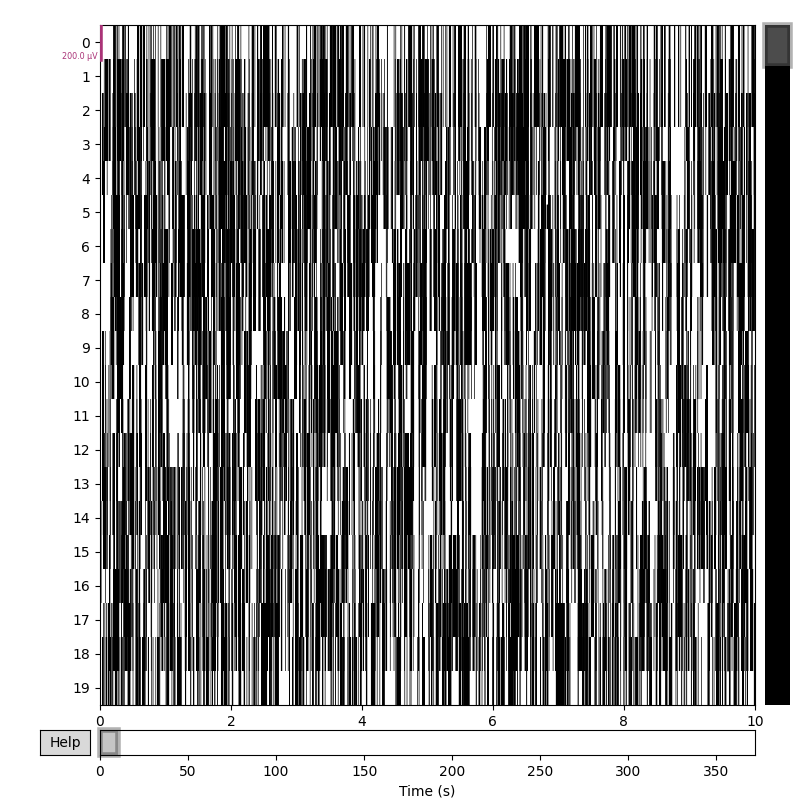

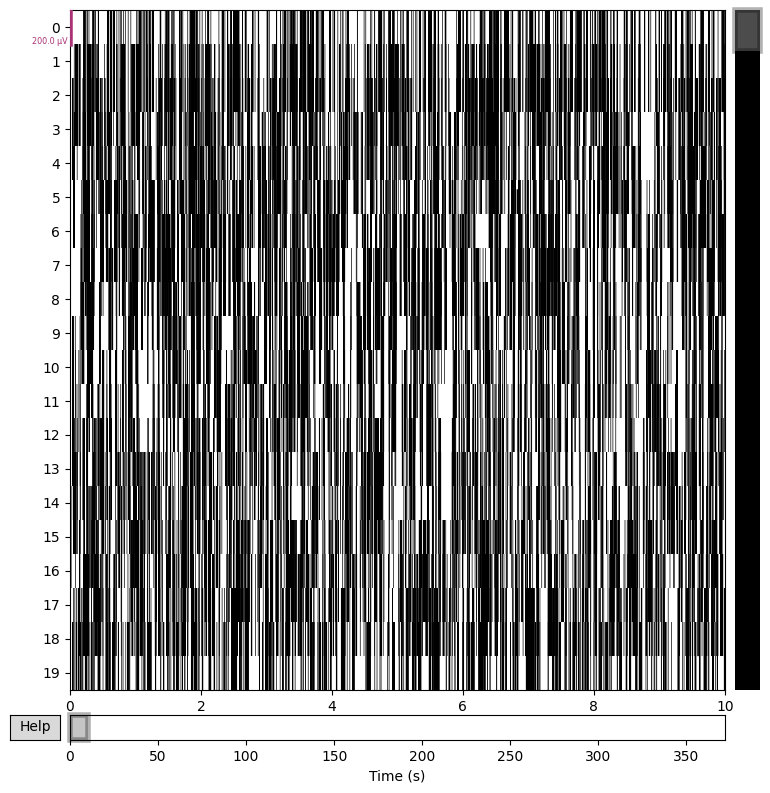

In [9]:
raw_ll.plot()